<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/5_Arboles_de_decisi%C3%B2n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles de decisión - teoría
---
* Los nodos del arbol : son las variables
* Las ramas las posibles categorias o valores, intervalos.
* El nodo terminal :  decisión final del algoritmo

se lee como conjunciones o disyunciones.

Algunas de la sventajas:
* facil de entender
* no se necesita mucha limpieza de datos, pue no influye demasiado que falten valores o tener outliers.

### Homogeneidad
Se requiere la mayor uniformidad o menor variabilidad entre los datos d eun subconjuto determinado.

### Entropía
Usa la teoria de la información. Mientras más puros(homogeneos) son los nodos de un arbol se requiere menos información para representarlos.

$H(s) = \displaystyle\sum_{i = 1}^{n} = -p_i \log_2(p_i) $

donde:

$p_i$ = Probabilidad

* Cuando $pi_i = 0$ los datos son perfectamente homogéneos
* Cuando $pi_i = 1$ los datos son perfectamente heterogéneos

* La entropia es máxima cuando $p_i = 0.5$

### Ganancia de información

Se gana información cuando tomamos como nodo de división a una categoría y esta es positiva.

se define como:

$\vartriangle H(S,V) = H(S) - \displaystyle\sum_{c \in V} \frac {|V = c|}{|V|} H(V=c) $

$V = $ Variable V dentro del conjunto de categorias existentes.

### algoritmos para elegir los subnodos  
* Indice de Gini - Par avariables binarias
* Detector Automatico de la Iteración Chi Cuadrado (CHAID) - gestiona más de dos categorias
* Reducción de la varianza - Gestiona cuando es una variable continua. La que tiene menor varinza ponderada es la que se usa para el nodo de decisión.


### La poda del árbol

El arbol puede crecer y tener muchos nodos hasta que los datos esten perfectameneclasificados y fueran totalmente homogeneos, de modo que un nodo ya no tendria heterogeneidad y todos los elemntos suyos serian clasificados bajo la misma categoria de la variable objetivo(overfiting).

Existen dos tecnicas, la **reducción del error en la poda** y la **poda del coste de complejidad**

## Problemas en el árbol
 * En caso de variables continuas hay que encontrar umbrales óptimos de corte para convertirlo en categorias.

 * Si faltan datos en el dataset, se asigna el valor más frecuente tomando en cuenta la variable target.









# Árboles de decisión en python
---
## Clasificar las flores pertenecientes a las 3 especies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

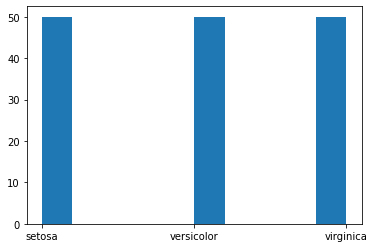

In [ ]:
plt.hist(data.Species)

In [ ]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Seleccionamos los features y el target

In [ ]:
colnames = data.columns.values.tolist()
predictors = colnames[:4] # No toma en cuenta la ultima fila
target = colnames[4]

Dividimos en training y testing

In [ ]:
data["is_train"] = np.random.uniform(0,1, len(data)) <=0.75
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


(array([ 38.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

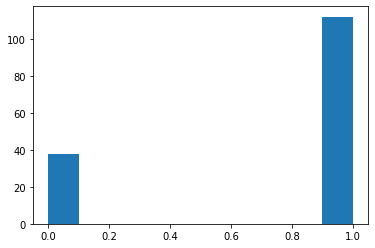

In [ ]:
plt.hist(data["is_train"].astype(int))

In [ ]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]
len(train), len(test)

(112, 38)

Realizamos la clasificación

In [ ]:
from sklearn.tree import DecisionTreeClassifier # existe el otro que e spara regresioón

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", # criterio de clasificación
                              min_samples_split=20, # numero minimo de elementos par realizar una decision (nodos), por defecto es 2
                              random_state=99 #semilla
                              #min_samples_leaf # numero minimo de muestras para crear un nodo
                              )
tree.fit(train[predictors],train[target])                         

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

Predicciones

In [ ]:
preds = tree.predict(test[predictors])

In [ ]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,14,0
virginica,0,1,10


#### Representación gráfica del árbol

Necesitamso crear un archivo .dot -- Visualización d egrafos

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
with open("/content/drive/MyDrive/Machine en Python  Udemy/recursos/iris_dtree.dot",
          "w" # Tpo de apertura, escribir
          ) as dotfile:
    export_graphviz(decision_tree=tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [ ]:
import os 
from graphviz import Source # Visualizaciòn para grafos

In [ ]:
file = open("/content/drive/MyDrive/Machine en Python  Udemy/recursos/iris_dtree.dot", "r") # r es en modo lectura
text = file.read()
text 

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 112\\nvalue = [37, 36, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.999\\nsamples = 75\\nvalue = [0, 36, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.398\\nsamples = 38\\nvalue = [0, 35, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 33\\nvalue = [0, 33, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.85\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 1, 36]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 0, 34]"] ;\n6 -> 8 ;\n}'

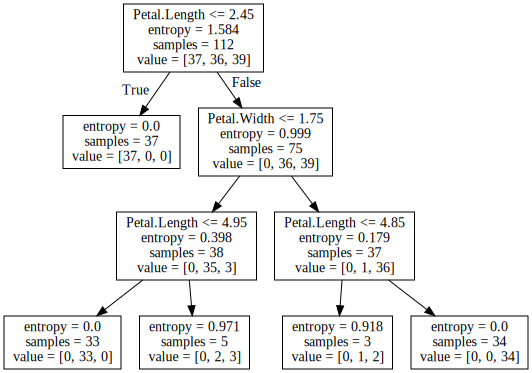

In [ ]:
Source(text)

In [ ]:
data.Species.unique() # Orden en el que clasificará el árbol value 
 * versicolor[0, 33, 0]
 * setosa[37, 0, 0]
 * virginica[0, 0, 34]


array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Interpretación de resultados

* La setosas son las más pequeñas.

* si la longitud del petalo (petal.lenght <=2.45 es true) es menor que 2.45, la especie  es una setosa.  De lo contrario(petal.lenght <=2.45) habrá que mirar el ancho de los petalos. Este nodo clasifica perfectamente ya que tiene 37 setosas, o virginicas y 0 versicolors([37, 0, 0])

* Si el largo de los petalos es mayor que 2.45 y el ancho es menor que 1.75, habrá que mirar el largo de los petalos. si estos ultimos son menores que 4.95 el árbol clasificará ima versicolor.

* Si el largo de los petalos es >= 2.45  y el ancho >= 1.75, habrá que mirar la longitud de los petalos. Si estos últimos son mayores a 4.85, el árbol clasificrá una virginica.

* otro punto ah señala es que la profundidad del árbol es de 2 decisones.

* También se observa que las medidas  de los sepalos es irrelevante para clasificarlos.

## Cross Validation para la Poda

In [ ]:
X = data[predictors]
Y = data[target]

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [ ]:
from sklearn.model_selection import KFold # librería de la validación cruzada

In [ ]:
# Validación cruzada de 10 grupos
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(estimator=tree, #árbol
                                X= X, # Conjuto de datos X
                                y= Y, # conjunto de datos Y
                                scoring="accuracy", # usamos el scoring de precisión, mal clasificados
                                cv=cv, # validación cruzada
                                n_jobs=1) # trabajos simultaemaente
score

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [ ]:
score = np.mean(score)
score # eficacia alta

0.9333333333333333

### Automatizar el nivel de profundidad del árbol

In [ ]:
for i in range(1,11):
  tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
  tree.fit(X,Y)
  cv = KFold(n_splits=10, shuffle=True, random_state=1)
  scores = cross_val_score(estimator=tree, X=X, y= Y, scoring="accuracy", cv=cv, n_jobs=1)
  score = np.mean(scores)
  print("score para i = ",i,"es de: ", round(score,4))
  print("Clasificador de rasgos", tree.feature_importances_)


score para i =  1 es de:  0.5667
Calsificador de rasgos [0. 0. 1. 0.]
score para i =  2 es de:  0.92
Calsificador de rasgos [0.         0.         0.66620285 0.33379715]
score para i =  3 es de:  0.94
Calsificador de rasgos [0.         0.         0.68976981 0.31023019]
score para i =  4 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]
score para i =  5 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]
score para i =  6 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]
score para i =  7 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]
score para i =  8 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]
score para i =  9 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]
score para i =  10 es de:  0.9333
Calsificador de rasgos [0.         0.         0.66869158 0.33130842]


Teniendo en cuenta el indicador accuracy, observamos que la puntuación maxima del indice se alcanza para una profundidad de 3, luego empieza a diminuir y ser constante.

en cuanto al clasificador de rasgos de importancia, este indica la importancia de la variables que se usan para clasificar, en el caso del modelo es **Petal.Length**.

Si solo se eligiria una variable(i=1) para clasificar la longitud de los petal seria la que más aporta al modelo.

En caso de ser 2 , la logitud de lo petalos se lleva el 66% y el ancho de los petalos el 33%.

En caso de 3, 68% y 31 % . por encima de 3 todos estan en relación de 2 a 1, y la longitud y el ancho de los sepalos no es importante en el modelo



# Arboles de regresión
---

#### Algoritmo
* Empezamos con un nodo con todas las observaciones
  * Calculamos la media y la varianza de la variable objetivo.
* Calculamos la reducción de la varianza para todas las posibles candidatos a variable del siguiente nodo eligiendo la que da máxima reducción de la misma en el nodo.
* Para cada nodo hoja comprobamos si:
  * La reducción maxima de la varianza es menor que un valor fijo
  * El número de observacionesen dicho nodo e smenor que un valor fijo.

#### Ventajas
 * Modela relaciones complejas no lineales.
 * Fácil de entender.
 * auqnue falten valores, se puede promediar en el último nodo donde se ah clasificado la observación.
 * Permiten seleccionar rasgos descriptivos importantes del dataset.


## Aplicación de árboles de regresión

### Valores de vivienda en los suburbios de Boston

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Boston.csv")
data.head()

In [ ]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

#### Modelo

In [ ]:
regtree = DecisionTreeRegressor(criterion='mse', 
                                min_samples_split=30,
                                min_samples_leaf=10,
                                max_depth = 5 # 5 nodos o profundidad
                                ,random_state=0)
regtree.fit(X,Y)

In [ ]:
preds = regtree.predict(data[predictors])
data["preds"] = preds

In [ ]:
data[["preds", "medv"]].head()

#### Gráficamos el árbol

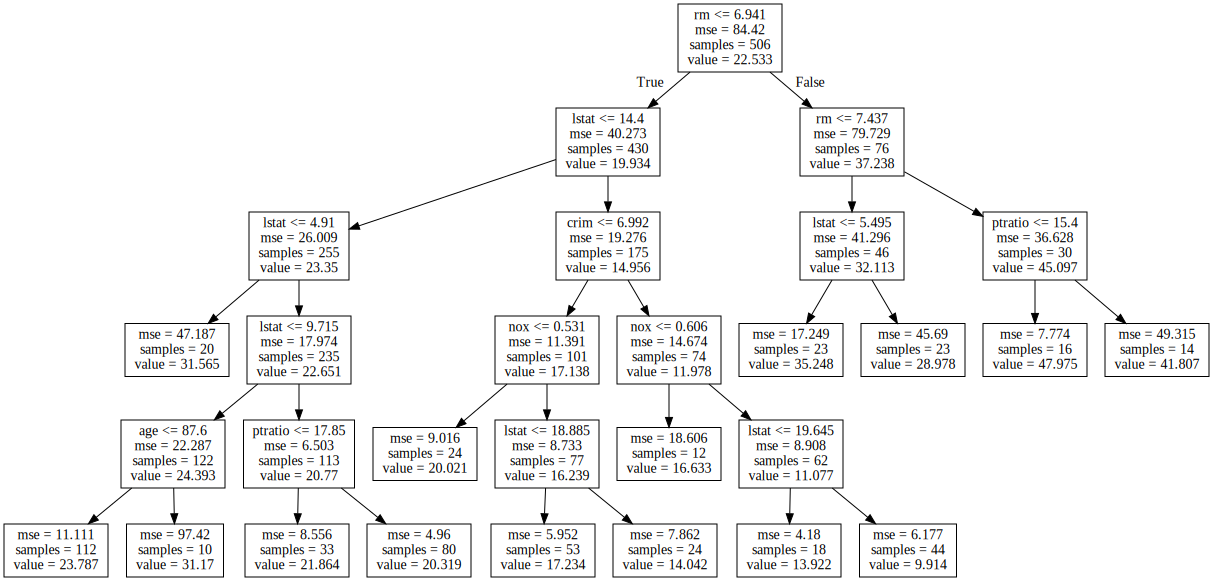

In [ ]:
from sklearn.tree import export_graphviz #para generar el gráfico
with open("/content/drive/MyDrive/Machine en Python  Udemy/recursos/boston_regtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

import os
from graphviz import Source
file = open("/content/drive/MyDrive/Machine en Python  Udemy/recursos/boston_regtree.dot", "r")
text = file.read()
Source(text)

#### Implementando la validación cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
cv = KFold(n_splits=10, max,shuffle=True, random_state=1)
scores = cross_val_score(regtree, X=X, y=Y, cv=cv,scoring="neg_mean_squared_error", n_jobs=1) # usamos el error cuadratico medio mientras más bajo mejor
score = np.mean(scores)
print(scores)
print(score)


-20.107307036443846
[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]


In [ ]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

De lo anterior se hace notar que la variable *rm* el número de habitaciones por casa(63%). La siguiente variable más importante es *lstat* (28%), age(0.17%)

#### Automatizando el proceso

In [ ]:
for i in range(1,10):
  regtree = DecisionTreeRegressor(criterion='mse', max_depth = i, min_samples_split=30, min_samples_leaf=10,random_state=0)
  regtree.fit(X,Y)

  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  import numpy as np
  cv = KFold(n_splits=10,shuffle=True, random_state=1)
  scores = cross_val_score(regtree, X=X, y=Y, cv=cv,scoring="neg_mean_squared_error", n_jobs=1) 
  score = np.mean(scores)

  print("Score para i= ",i, round(score,4))
  print("Clasificador de razgos= ",tree.feature_importances_)

La profudindidad dle árbol será de 5, y que el error cudratico medio se estabiliza en 20

# Bosques Aleatorios (aprendizaje por combinación)

* Métodos de promedio: se crean varios modelos similares e independientes y se hace un promedio de las predicciones de cada modelo.
* Métodos de impulso: reducir el sesgo del estimador combinado construyendolo de forma secueción de los estimadores base. así conseguimos un modelo más robusto a partir de varios más debiles.

#### Ventajas:
* No necesita validación cruzada, ya que utiliza el método **bagging**
  * Con n observaciones en el dataset de entrenamiento T y m variables, decidimos hacer crecer S árboles en nuestro bosque. Cada uno sera creado con un datset de entrenamiento separado.
* Las n observaciones para cada dataset se toman aleatoriamente con reemplazo del datset original.
* Cada dataset puede tener obserbaciones duplicadas y algunas no aparecer nunca como entrenamiento.
* Estos datsets se llaman muestras de **bootsrap** o bolsas.


### Algoritmo
* 1- Tomamaos una muestra aleatoria simple de tamaño n con reemplazo.
* 2 - Tomamaos una muestra aleatoria simple de variables predicitoras sin reemplazo.
* 3 - construimos un árbol de regresión con los predictores elegidos en 2 y sin podar el árbol.
* 4 -  Clasificamos las obserbaciones fuera de la bolsa con dicho árbol y almacenamos el valor o la clase asignad apara cada una.
* 5 - Repetimos los pasos 1 a 4 un número de veces para tener el bosque de árboles.
* 6 - La predicción final es el promedio de las observaciones de todos los árboles o para clasificación, la clase con mayoría de votos en el conjunto de árboles.



### Random forest para Regresión

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_jobs=2, # Numero de nucleos en paralelo
                               oob_score=True, # Va hacer un muestreo solo, bootsrap
                               n_estimators=50 # Número de árboles, se puede agregar hasta 10000 y mas
                               )
forest.fit(X,Y)

In [ ]:
# Predicciones
data["rforest_pred"] = forest.oob_prediction_ 
data[["rforest_pred", "medv"]]

In [ ]:
# Estimación del error cuadratico medio
data["rforest_error"] = (data["rforest_pred"] - data["medv"])**2
sum(data["rforest_error"])/len(data)

El error es menor que el el modleo anterior que se usaba validación cruzada.

Si se agrega más árboles al modelo mejora los indices y  disminuye el error. Esto se hace hasta que aportar mas árboles al modelo disminuya muy poco o nada.

In [ ]:
forest.oob_score_ # R cudrado ajustado

0.8732732205463587

### Random forest para clasificación

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/iris.csv")

colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

X = data[predictors]
Y = data[target]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
forest.oob_decision_function_

In [ ]:
forest.oob_score_ # Precisión mayor que la validación cruzada, con un unico árbol

0.96

### Por qué funciona los random forest?

*  Al ir tomando más y más modelos en consideración se maximiza la reducción de la varianza simplemente la varianza quedar dividida por raiz de n donde n es el número de árboles que se utilizan y por tanto al tomar una muestra aleatoria simple de devalores e ir creando árboles y árboles y árboles al final el hecho de que justamente creas un mal árbol queda compensado por la mejoría en el resto de árboles y el error va quedando dividido a medida que uno va metiendo más y más árboles dentro del bosque.

* Entonces bueno random forest es uno de esos algoritmos donde todas las variables del Data Set son utilizadas óptimamente  de la forma más óptima.

### Parametros más importantes de los random forest (para afinar)
* Tamaño del nodo (min_samples_leaft)
* Número de árboles (n_estimators), tipicamnte se usa 500
* Número de predictores muestreados
